year
1957    4.014241
1972    4.011136
1952    4.000000
1954    3.994220
1951    3.983539
          ...   
2005    3.448434
2003    3.444777
1996    3.426600
1997    3.415764
2000    3.356104
Name: rating, Length: 62, dtype: float64

С ростом года выпуска фильма средний рейтинг становится ниже


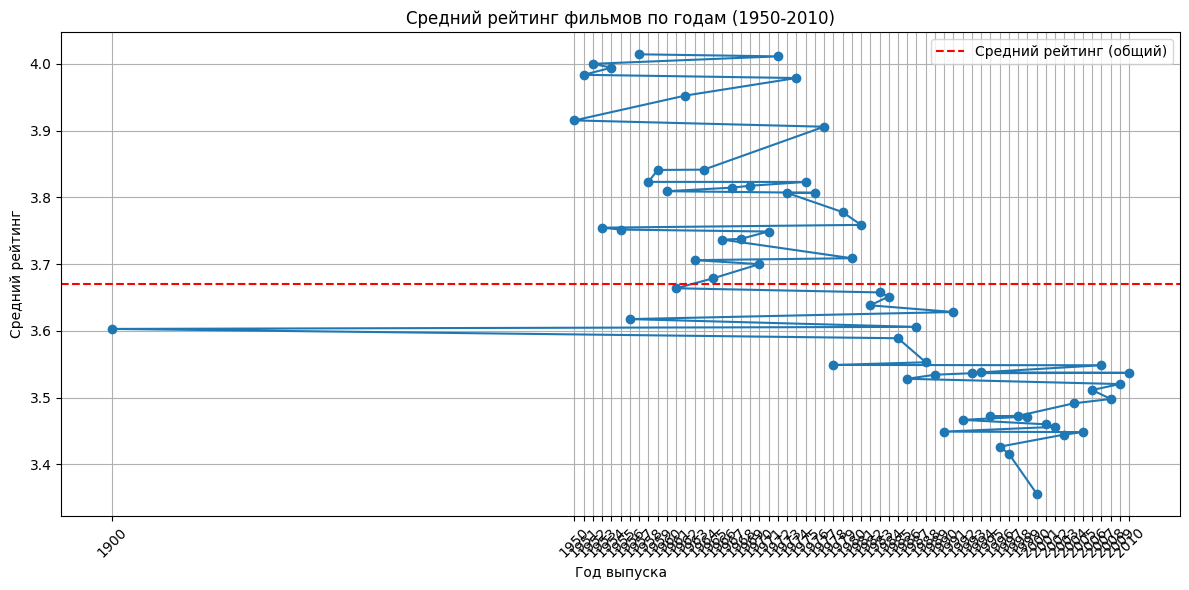

In [10]:
import pandas as pd


df = pd.read_csv(r'C:\Users\Admin\Downloads\movies_stats.csv', encoding='utf-8')

# 1
years = list(range(1950, 2011))

# 2
def production_year(title):
    for year in years:
        if str(year) in title:
            return year
    return 1900

# 3
df['year'] = df['title'].apply(production_year)

# 4
avg_ratings = df.groupby('year')['rating'].mean().sort_values(ascending=False)

print(avg_ratings)
print()
print('С ростом года выпуска фильма средний рейтинг становится ниже')

# Для наглядности от себя (график получился не особо, но в целом иллюстрирует, что с ростом года выпуска фильма средний рейтинг становится ниже)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(avg_ratings.index, avg_ratings.values, marker="o")
plt.title("Средний рейтинг фильмов по годам (1950-2010)")
plt.xlabel("Год выпуска")
plt.ylabel("Средний рейтинг")
plt.xticks(avg_ratings.index, rotation=45)  
plt.grid(True)
plt.axhline(
    y=avg_ratings.mean(), color="r", linestyle="--", label="Средний рейтинг (общий)"
)
plt.legend()
plt.tight_layout()
plt.show()